In [1]:
import numpy as np

### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [2]:
def knn(X_train, y_train, X_test, k, w=0.25):
    
    # приведение к массиву формой (<test кол-во наблюдений>, <train кол-во наблюдений>, <признаки>)
    X_train_ = np.resize(X_train, (X_test.shape[0], X_train.shape[0], X_train.shape[1]))
    # добавление еще одной оси для выполнения операций над обоими массивами
    X_test_ = np.resize(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    # вычисление Эвклидового расстояния до каждого объекта в train
    test_distances = np.linalg.norm(X_train_ - X_test_, axis=2, ord=2)
    
    # нахождение индексов k-ближайших соседей
    k_nearest_idx = np.argpartition(test_distances, range(k))[:, :k]
    k_nearest = y_train[k_nearest_idx]

    # нулевой массив формой (<кол-во наблюдений>, <кол-во классов>)
    # строки - наблюдения
    # столбцы - номер класса
    z = np.zeros((k_nearest.shape[0], len(set(y_train))))
    
    rows = range(z.shape[0])
    # запись в массив значений в соответствии с номером соседа
    for i in range(k):
        z[rows, k_nearest[:, i]] += w**(i+1)
    
    # определение индекса (номера класса) максимального значения для каждого наблюдения
    answers = np.argmax(z, axis=1)
    
    return answers

### 2. * Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [3]:
def kmeans(data, k, max_iter=100, min_distance=1e-4):
    # зададим начальные центроиды случайными объектами из выборки
    centroids = X[np.random.permutation(X.shape[0])[:k]]

    for _ in range(max_iter):
        # изменение формы массивов для возможности дальнейших расчетов
        centroids_ = np.resize(centroids, (data.shape[0], centroids.shape[0], centroids.shape[1]))
        data_ = np.resize(X, (data.shape[0], 1, data.shape[1]))

        # вычисление расстояний от объектов до центроид
        distances = np.linalg.norm(centroids_ - data_, axis=2)
        # выбор ближайшей центроиды для каждого объекта
        clusters = np.argmin(distances, axis=1)
        
        old_centroids = centroids.copy()
        
        for i in range(centroids.shape[0]):
            # перемещение центроид в центр выборок, отнесенных к этим центроидам
            centroids[i] = np.mean(X[clusters == i], axis=0)
            
        # если отклонение новых центроид от старых меньше минимального, то выходим из цикла
        # из всех отклонений берется максимальное
        if np.max(np.linalg.norm(old_centroids - centroids, axis=1, ord=2)) < min_distance:
            break
            
    return old_centroids, clusters

In [4]:
def intraclusters_distance(centroids, data, clusters):
    square_distances = []
    # цикл по количеству кластеров
    for i, centroid in enumerate(centroids):
        # определение расстояние до центроиды своего кластера
        distances = np.linalg.norm(data[clusters == i] - centroid, axis=1, ord=2)
        # сумма квадратов расстояний до центроиды
        sum_square_distance = np.sum(distances**2)
        square_distances.append(sum_square_distance)
    return np.mean(square_distances)

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=1)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

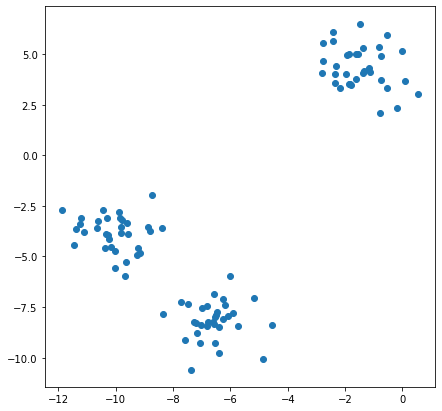

In [7]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [8]:
def visualize(centroids, data, clusters):
    colors = ListedColormap(['r', 'g', 'b', 'orange', 'y', 'purple', 'brown', 'violet'])
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=colors)
        
    plt.show()

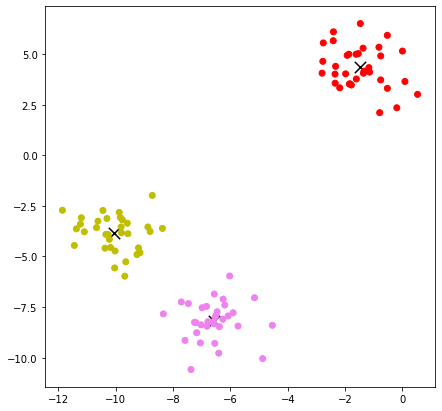

CPU times: user 137 ms, sys: 2.67 ms, total: 139 ms
Wall time: 139 ms


In [10]:
%%time
k = 3
centroids, clusters = kmeans(X, k)

visualize(centroids, X, clusters)

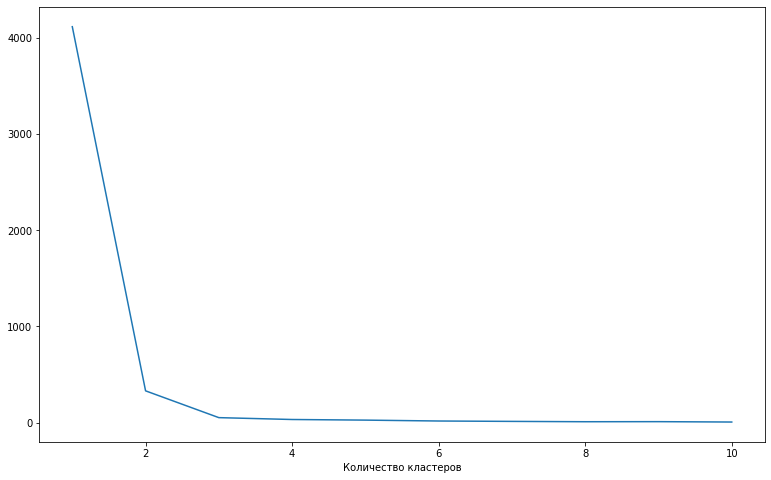

CPU times: user 146 ms, sys: 4.04 ms, total: 150 ms
Wall time: 149 ms


In [11]:
%%time
k_list = list(range(1, 11))
mean_distances = []

for k in k_list:
    centroids, clusters = kmeans(X, k)
    mean_distances.append(intraclusters_distance(centroids, X, clusters))


plt.figure(figsize=(13, 8))
plt.title('')
plt.xlabel('Количество кластеров')
plt.ylabel('')

plt.plot(k_list, mean_distances)
plt.show()

### 3. * Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).

Оптимизировано в 1-ом задании. Продублирую

In [12]:
def knn(X_train, y_train, X_test, k, w=0.25):
    
    # приведение к массиву формой (<test кол-во наблюдений>, <train кол-во наблюдений>, <признаки>)
    X_train_ = np.resize(X_train, (X_test.shape[0], X_train.shape[0], X_train.shape[1]))
    # добавление еще одной оси для выполнения операций над обоими массивами
    X_test_ = np.resize(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    # вычисление Эвклидового расстояния до каждого объекта в train
    test_distances = np.linalg.norm(X_train_ - X_test_, axis=2, ord=2)
    
    # нахождение индексов k-ближайших соседей
    k_nearest_idx = np.argpartition(test_distances, range(k))[:, :k]
    k_nearest = y_train[k_nearest_idx]

    # нулевой массив формой (<кол-во наблюдений>, <кол-во классов>)
    # строки - наблюдения
    # столбцы - номер класса
    z = np.zeros((k_nearest.shape[0], len(set(y_train))))
    
    rows = range(z.shape[0])
    # запись в массив значений в соответствии с номером соседа
    for i in range(k):
        z[rows, k_nearest[:, i]] += w**(i+1)
    
    # определение индекса (номера класса) максимального значения для каждого наблюдения
    answers = np.argmax(z, axis=1)
    
    return answers

Ниже демонстрация скорости работы

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [14]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

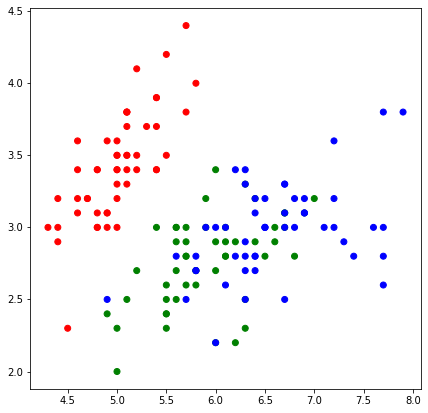

In [16]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Сначала посмотрим время для расчетов старой функцией

In [17]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [18]:
# Старая функция. Добавление весов для соседей
def old_knn(x_train, y_train, x_test, k, w=0.25):
    
    answers = []
    for x in x_test:

        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            classes[d[1]] += w**(i+1)

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [19]:
def get_graph(X_train, y_train, k, knn_alg):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn_alg(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Построение графика старой функцией

(58800, 2)


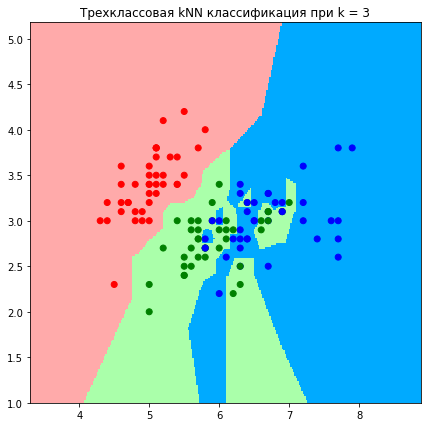

CPU times: user 1min 55s, sys: 247 ms, total: 1min 55s
Wall time: 1min 56s


In [20]:
%%time
k = 3
get_graph(X_train, y_train, k, old_knn)

Построение графика новой функцией

(58800, 2)


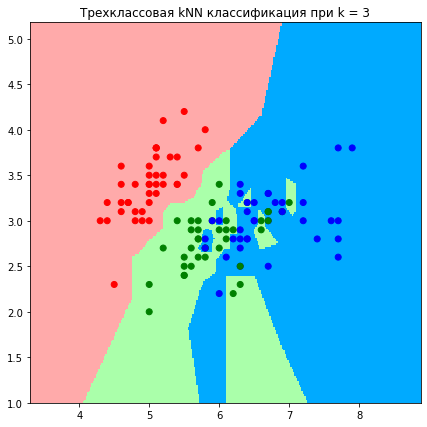

CPU times: user 380 ms, sys: 236 ms, total: 616 ms
Wall time: 616 ms


In [21]:
%%time
k = 3
get_graph(X_train, y_train, k, knn)